In [1]:
import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
# import torch
 
# print(torch.cuda.is_available())
 
# print(torch.cuda.device_count())
 
# print(torch.cuda.get_device_name(0))
 
# print(torch.cuda.current_device())
 
# print(torch.cuda.get_device_properties(0))

In [4]:
'''
#!pip install livelossplot
!python -m pip install --upgrade pip
%matplotlib inline
!pip install Livelossplot
'''

'\n#!pip install livelossplot\n!python -m pip install --upgrade pip\n%matplotlib inline\n!pip install Livelossplot\n'

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#!pip install livelossplot
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#!pip install Livelossplot
#from Livelossplot import PlotLossesKeras

from glob import glob
import os
import shutil

import numpy as np
import pandas as pd
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
sampling_seed=0
size_4_training=78786
size_4_training_0=198738
size_4_training_1=198738
epoch_4_test=30
img_size=50
#training_reshape=(-1, img_size, img_size, 3)

# **Loading Training Files**

I have converted all images to numpy array to boost speed

In [7]:
'''
os.makedirs('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/idc-minus/')     
os.makedirs('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/idc-plus/')  
os.makedirs('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/idc-minus/')     
os.makedirs('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/idc-plus/')  
os.makedirs('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/val_seg/idc-minus/')     
os.makedirs('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/val_seg/idc-plus/')  
os.mkdir('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/History')
'''

"\nos.makedirs('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/idc-minus/')     \nos.makedirs('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/idc-plus/')  \nos.makedirs('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/idc-minus/')     \nos.makedirs('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/idc-plus/')  \nos.makedirs('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/val_seg/idc-minus/')     \nos.makedirs('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/val_seg/idc-plus/')  \nos.mkdir('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/History')\n"

In [8]:
'''
import sklearn
import random
from sklearn.model_selection import train_test_split

import shutil
from glob import glob 
#make directory for labelling

train_dir='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/'
validation_dir='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/val_seg/'
#train_dir='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/'  
#test_dir = 'C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/normal'  
test_dir = 'C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/'  

class0 = [] # 0 = idc+
class1 = [] # 1 = idc-
imagePatches = glob('C:/Users/2351980g/Documents/output/covxnet/input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

print(class0[0:10])

#sampling 10000 images from class 0 and class 1 to train the model

random.seed(sampling_seed)
class0sample=random.sample(class0,size_4_training_0)
class0label=np.zeros(size_4_training_0)
class1label=np.ones(size_4_training_1)

if size_4_training_1 <= 78786:
    class1sample=random.sample(class1,size_4_training_1)

elif size_4_training_1 >78786 and size_4_training_1 <= 78786*2:
    class1sample_1=random.sample(class1,78786)
    #for i in range(len(class1sample_1)):
    #    class1sample_1[i] = class1sample_1[i].replace('.png','') +'_01.png'  
    class1sample_2=random.sample(class1,(size_4_training_1-78786))
    class1sample=np.concatenate((class1sample_1,class1sample_2))


elif size_4_training_1 > 78786*2 and size_4_training_1 <= 78786*3:
    class1sample_1=random.sample(class1,78786)
    #for i in range(len(class1sample_1)):
    #    class1sample_1[i] = class1sample_1[i].replace('.png','') +'_01.png' 
    class1sample_2=random.sample(class1,78786)
    #for i in range(len(class1sample_2)):
    #    class1sample_2[i] = class1sample_2[i].replace('.png','') +'_02.png' 
    class1sample_3=random.sample(class1,(size_4_training_1-78786*2))
    class1sample_4=np.concatenate((class1sample_1,class1sample_2))
    class1sample=np.concatenate((class1sample_4,class1sample_3))
    print(len(class1sample))



class0sample_train, class0sample_test1, class0label_train, class0label_test1 = train_test_split(class0sample, class0label, test_size=0.3, random_state=42)
class0sample_val, class0sample_test, class0label_val, class0label_test = train_test_split(class0sample_test1, class0label_test1, test_size=0.3, random_state=42)
print(len(class0sample_train))
print(len(class0sample_test))
print(len(class0sample_val))
class1sample_train, class1sample_test1, class1label_train, class1label_test1 = train_test_split(class1sample, class1label, test_size=0.3, random_state=42)
class1sample_val, class1sample_test, class1label_val, class1label_test = train_test_split(class1sample_test1, class1label_test1, test_size=0.3, random_state=42)
print(len(class1sample_train))
print(len(class1sample_test))
print(len(class1sample_val))


'''

'\nimport sklearn\nimport random\nfrom sklearn.model_selection import train_test_split\n\nimport shutil\nfrom glob import glob \n#make directory for labelling\n\ntrain_dir=\'C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/\'\nvalidation_dir=\'C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/val_seg/\'\n#train_dir=\'C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/\'  \n#test_dir = \'C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/normal\'  \ntest_dir = \'C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/\'  \n\nclass0 = [] # 0 = idc+\nclass1 = [] # 1 = idc-\nimagePatches = glob(\'C:/Users/2351980g/Documents/output/covxnet/input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png\', recursive=True)\nfor filename in imagePatches:\n    if filename.endswith("class0.png"):\n         class0.append(filename)\n    else:

In [9]:
'''
def read_and_save_data(path, file_name_array):
    j=0
    for i in file_name_array:
        if i.endswith('.png'):
          
            
            #second copy method
            head, tail = os.path.split(i)
            tail=tail.replace('.png','_')
            tail=tail +str(j)+'.png'
            #print(tail)
            outputname=str(path+tail)
            #outputname=str(path+str(j)+'.png')
            #print(outputname)
            shutil.copy(i, outputname)
   
            #print(status2)
            
            j=j+1
            if j==198739:
                break
            
   
class0train_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/idc-minus/'
class1train_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/idc-plus/'
class0test_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/idc-minus/'
class1test_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/idc-plus/'
class0val_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/val_seg/idc-minus/'
class1val_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/val_seg/idc-plus/'

read_and_save_data(class0train_path,class0sample_train)
read_and_save_data(class1train_path,class1sample_train)


read_and_save_data(class0test_path,class0sample_test)
read_and_save_data(class1test_path,class1sample_test)


read_and_save_data(class0val_path,class0sample_val)
read_and_save_data(class1val_path,class1sample_val)
'''

"\ndef read_and_save_data(path, file_name_array):\n    j=0\n    for i in file_name_array:\n        if i.endswith('.png'):\n          \n            \n            #second copy method\n            head, tail = os.path.split(i)\n            tail=tail.replace('.png','_')\n            tail=tail +str(j)+'.png'\n            #print(tail)\n            outputname=str(path+tail)\n            #outputname=str(path+str(j)+'.png')\n            #print(outputname)\n            shutil.copy(i, outputname)\n   \n            #print(status2)\n            \n            j=j+1\n            if j==198739:\n                break\n            \n   \nclass0train_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/idc-minus/'\nclass1train_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/idc-plus/'\nclass0test_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/idc-minus/'\nclass1test_path='C:/Users/2

In [10]:
import os #Operating System
import sys #System
# train_generator = train_datagen.flow(x_train, y_train, batch_size =)
# val_generator = val_datagen.flow(x_val, y_val, batch_size = 64)
# test_generator=test_datagen.flow(x_test,y_test,batch_size = 64)


In [11]:
class0train_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/idc-minus/'
class1train_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/train_seg/idc-plus/'
class0test_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/idc-minus/'
class1test_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/test_seg/idc-plus/'
class0val_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/val_seg/idc-minus/'
class1val_path='C:/Users/2351980g/Documents/output/covxnet/230117oversampling/working/data/val_seg/idc-plus/'

In [12]:

import os
import cv2
def readImage(path, tag):
    j=0
    image_data = []
    label=[]
    for i in os.listdir(path):
        imgname=path+i
        #print(imgname)
        img = cv2.imread(imgname, cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, (img_size,img_size), interpolation=cv2.INTER_LINEAR)
        image_data.append(img_resized)
        label.append(tag)
        #print(img[1])
        j=j+1
        #if j==10:
        #    break
        
    return image_data, label

import numpy as np
from tensorflow.keras.utils import *
from sklearn.utils import shuffle

class0_train, train0_label = readImage(class0train_path, 0)
class1_train, train1_label  = readImage(class1train_path, 1)
class0_test, test0_label = readImage(class0test_path, 0)
class1_test, test1_label = readImage(class1test_path, 1)
class0_val, val0_label = readImage(class0val_path, 0)
class1_val, val1_label = readImage(class1val_path, 1)

def Image_array_process(class0array,label0, class1array, label1):
    class0_array=np.array(class0array)
    class1_array=np.array(class1array)
    combined_data = np.concatenate((class0_array, class1_array))
    combined_label= np.concatenate((label0,label1), axis=0)
    assert len(combined_data) == len(combined_label)
    combined_data, combined_label = shuffle(combined_data, combined_label, random_state=0)
    print(combined_data.shape)
    length=len(combined_data)
    combined_label=to_categorical(combined_label,num_classes=2)
    #i=0
    #for i in range(length):
    #    print(combined_label[i])



    #print(class0_array.shape)
    #print(combined_data.shape)
    
    return combined_data, combined_label


X_train, y_train=Image_array_process(class0_train, train0_label, class1_train, train1_label)
X_test, y_test=Image_array_process(class0_test, test0_label, class1_test, test1_label)
X_val, y_val=Image_array_process(class0_val, val0_label, class1_val, val1_label)


(278232, 50, 50, 3)
(35774, 50, 50, 3)
(83470, 50, 50, 3)


In [13]:
train_data=X_train
train_label=y_train

test_data=X_test
test_label=y_test

val_data=X_val
val_label=y_val

## Visualization

In [14]:
import matplotlib.pyplot as plt

### Normal

In [15]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
       '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n      "

# Viral

In [16]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [17]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

# Loading Test Data

In [18]:
'''
test_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')
test_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')
test_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')

test_normal.shape, test_viral.shape , test_bacterial.shape

label_test_normal = np.zeros(len(test_normal))
label_test_bacterial = np.ones(len(test_bacterial))
label_test_viral = np.full(len(test_viral),2, dtype = int)

test_data.shape
'''

"\ntest_normal = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Normal_128.npy')\ntest_viral = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_Virus_128.npy')\ntest_bacterial = np.load('../input/pneumonia-chest-xray-npy/Array128/Array128/test_bacteria_128.npy')\n\ntest_normal.shape, test_viral.shape , test_bacterial.shape\n\nlabel_test_normal = np.zeros(len(test_normal))\nlabel_test_bacterial = np.ones(len(test_bacterial))\nlabel_test_viral = np.full(len(test_viral),2, dtype = int)\n\ntest_data.shape\n"

## Visualization

## Normal

In [19]:
 '''

n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\n\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_normal[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Viral

In [20]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_viral[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

## Bacterial

In [21]:
 '''
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
         '''

"\nn_row = 3\nn_col = 5\n\nfig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)\n\nfor row in tqdm(range(n_row)):\n   \n   for col in range(n_col):\n       \n       ax[row][col].imshow(test_bacterial[row*n_col + col,:,:,0], cmap = 'bone')\n       ax[row][col].set_xticks([])\n       ax[row][col].set_yticks([])\n        "

**Label encode**

In [22]:
'''
from tensorflow.keras.utils import to_categorical
y_label=train_label
train_label = to_categorical(train_label, num_classes= 2)
test_label  = to_categorical(test_label, num_classes = 2)
'''

'\nfrom tensorflow.keras.utils import to_categorical\ny_label=train_label\ntrain_label = to_categorical(train_label, num_classes= 2)\ntest_label  = to_categorical(test_label, num_classes = 2)\n'

# Dealing with Class Imbalance

In [23]:
'''
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
print(class_weights)

weights = {i : class_weights[i] for i in range(5)}
#five will give an error
#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}
print(weights)
'''

"\nfrom sklearn.utils.class_weight import compute_class_weight\nclass_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nprint(class_weights)\n\nweights = {i : class_weights[i] for i in range(5)}\n#five will give an error\n#weights = {l:c for l,c in zip(np.unique(y_label), class_weights)}\nprint(weights)\n"

In [24]:
'''
from sklearn.utils import class_weight
weight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)
weight = {i : weight[i] for i in range(2)}
#the 2 must be equal to classes no
print(weight)

'''

"\nfrom sklearn.utils import class_weight\nweight = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_label), y=y_label)\nweight = {i : weight[i] for i in range(2)}\n#the 2 must be equal to classes no\nprint(weight)\n\n"

# [CovXNet: A multi-dilation convolutional neural network for automatic COVID-19 and other pneumonia detection from chest X-ray images with transferable multi-receptive feature optimization](https://www.sciencedirect.com/science/article/pii/S0010482520302250)

#### Code:[here](https://github.com/Perceptron21/CovXNet)
## Residual & Shifter Unit:
![Residual & Shifter Unit](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr2.jpg)

## Model:
![Model](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520302250-gr4.jpg)


## Residual Unit

In [25]:
def Residual_Unit(input_tensor, nb_of_input_channels, max_dilation, number_of_units):
    
  for i in range(number_of_units):
    x1 = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)
  
    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)
    x = Conv2D(nb_of_input_channels, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    x = Add()([x, input_tensor])

    input_tensor = x
  
  return x


## Shifter Unit

In [26]:
# Shifter Unit:

def Shifter_Unit(input_tensor, nb_of_input_channels, max_dilation):
    x1 = Conv2D(nb_of_input_channels*4, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(input_tensor)
    x1 = BatchNormalization()(x1)

    a = []

    for i in range(1, max_dilation+1):
      temp = DepthwiseConv2D( kernel_size=(3,3), dilation_rate = (i,i), padding = 'same', activation= 'relu')(x1)
      temp = MaxPool2D(pool_size=(2,2))(temp)
      temp = BatchNormalization()(temp)
      a.append(temp)

    x = Concatenate(axis= -1)(a)

    x = Conv2D(nb_of_input_channels*2, kernel_size = (1,1), strides = (1,1), padding='same', dilation_rate= (1,1), activation='relu')(x)
    x = BatchNormalization()(x)

    return x

# Network128

In [27]:
from tensorflow.keras.optimizers import Adam

100%|██████████| 3/3 [00:00<00:00, 134.15it/s]


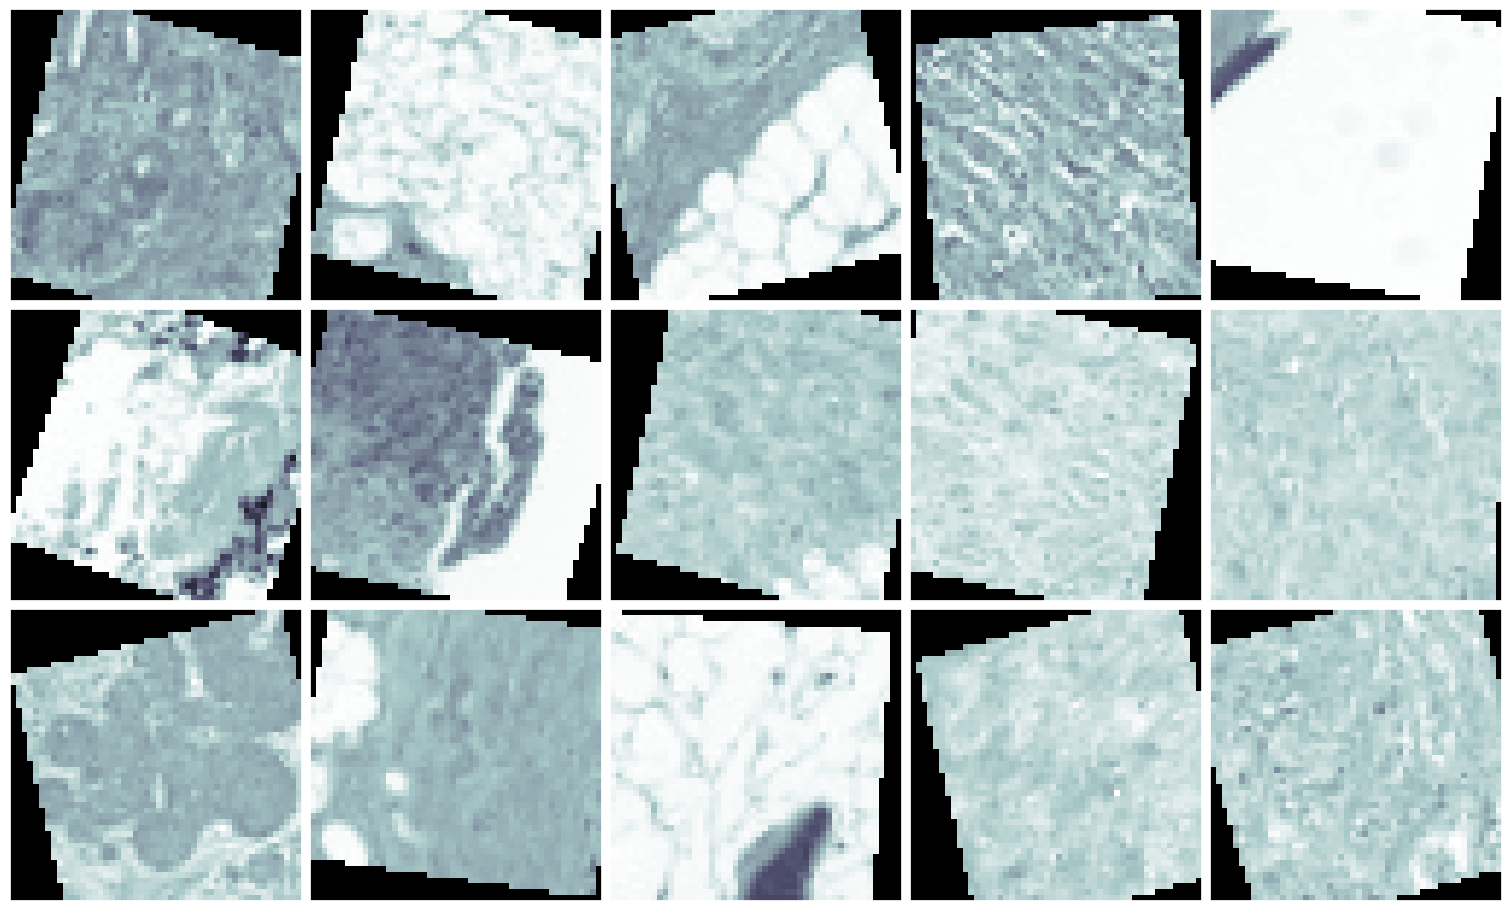

In [35]:
n_row = 3
n_col = 5

fig, ax = plt.subplots(n_row, n_col, figsize = (n_col*3, n_row*3), constrained_layout = True)

for row in tqdm(range(n_row)):
    
    for col in range(n_col):
        
        ax[row][col].imshow(images[row*n_col + col,:,:,0], cmap = 'bone')
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

# Callback

In [36]:
#os.mkdir('Model')


In [37]:
#os.mkdir('History')
def get_callbacks():
    
#    filepath = './Model/best_model_multiclass_128.hdf5'
    filepath = 'C:/Users/2351980g/Documents/output/covxnet/230117oversampling/History/best_model_multiclass_128.h5'
    callback1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    #callback1 = ModelCheckpoint(filepath, verbose=1, save_best_only=True, mode='min')
    callback2 = MyLogger(val_generator, 
                         y_test = np.argmax(test_label, axis = 1),
                         class_labels = ['idc-', 'idc+'])
    
    callback3 = CSVLogger('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/History/Multiclass_Log_128.csv')

    return [callback1 ,callback2, callback3]

# Training

In [38]:
model = Network128(input_shape = (img_size, img_size, 3), nb_class = 2, depth = 5)
model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 50, 50, 16)   1216        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 50, 50, 16)  64          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 conv2d_1 (Conv2D)              (None, 25, 25, 32)   4640        ['batch_normalization[0][0]']

# Plotting Model

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [40]:
'''
import tensorflow
gpu_test= tensorflow.test.is_gpu_available()
print("GPU是否可用",gpu_test)
'''

'\nimport tensorflow\ngpu_test= tensorflow.test.is_gpu_available()\nprint("GPU是否可用",gpu_test)\n'

load weight success
Epoch 1/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2281 - accuracy: 0.9067
Epoch 1: val_accuracy improved from -inf to 0.91628, saving model to C:/Users/2351980g/Documents/output/covxnet/230117oversampling/History\best_model_multiclass_128.h5
Predicting test data
2236/2236 [==============================] - 577s 257ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:09:37.704948


---------------------
| Balanced Accuracy  |
---------------------

    0.9162240733493598


---------------------
|      Accuracy      |
---------------------

    0.9162240733493598


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.945382  0.883491  0.913389     17887
           1   0.890650  0.948957  0.918879     17887

    accuracy                       0.916224     35774
   macro avg   0.918016  0.916224  0.916134     35774
weighted avg   0.918016  0.916224  0.9161

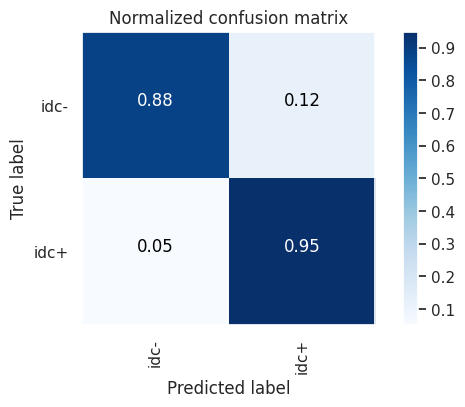

17389/17389 [==============================] - 15033s 864ms/step - loss: 0.2281 - accuracy: 0.9067 - val_loss: 26.1990 - val_accuracy: 0.9163
Epoch 2/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2254 - accuracy: 0.9080
Epoch 2: val_accuracy improved from 0.91628 to 0.91711, saving model to C:/Users/2351980g/Documents/output/covxnet/230117oversampling/History\best_model_multiclass_128.h5
Predicting test data
2236/2236 [==============================] - 618s 276ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:18.465241


---------------------
| Balanced Accuracy  |
---------------------

    0.917118577738022


---------------------
|      Accuracy      |
---------------------

    0.9171185777380221


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.945752  0.885000  0.914368     17887
           1   0.891942  0.949237  0.919698     17887

    accuracy             

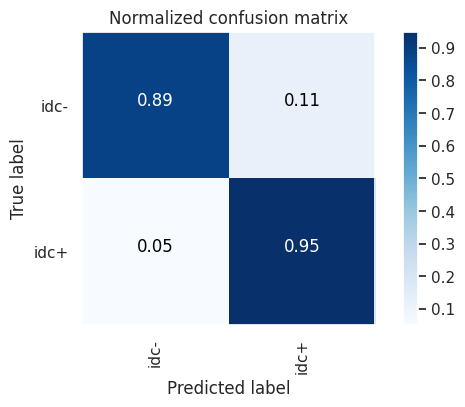

17389/17389 [==============================] - 15276s 878ms/step - loss: 0.2254 - accuracy: 0.9080 - val_loss: 22.3637 - val_accuracy: 0.9171
Epoch 3/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2231 - accuracy: 0.9087
Epoch 3: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 606s 271ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:06.463906


---------------------
| Balanced Accuracy  |
---------------------

    0.9149102700285123


---------------------
|      Accuracy      |
---------------------

    0.9149102700285123


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.948836  0.877117  0.911568     17887
           1   0.885753  0.952703  0.918009     17887

    accuracy                       0.914910     35774
   macro avg   0.917294  0.914910  0.914789     35774
weighted avg   0.917294  0.914910  0

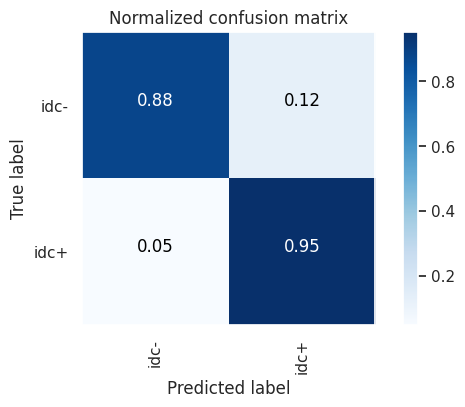

17389/17389 [==============================] - 15351s 883ms/step - loss: 0.2231 - accuracy: 0.9087 - val_loss: 17.4928 - val_accuracy: 0.9149
Epoch 4/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2209 - accuracy: 0.9103
Epoch 4: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 610s 273ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:10.379436


---------------------
| Balanced Accuracy  |
---------------------

    0.9144350645720356


---------------------
|      Accuracy      |
---------------------

    0.9144350645720356


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.943255  0.881925  0.911560     17887
           1   0.889134  0.946945  0.917129     17887

    accuracy                       0.914435     35774
   macro avg   0.916195  0.914435  0.914345     35774
weighted avg   0.916195  0.914435  0

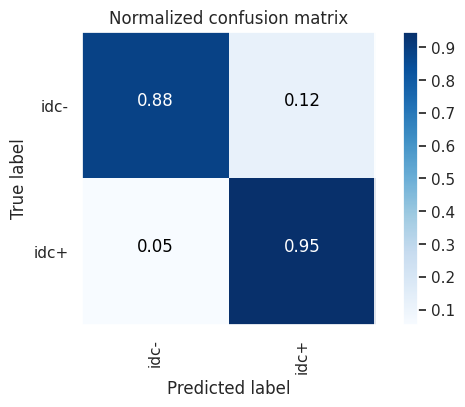

17389/17389 [==============================] - 15351s 883ms/step - loss: 0.2209 - accuracy: 0.9103 - val_loss: 20.5693 - val_accuracy: 0.9145
Epoch 5/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2193 - accuracy: 0.9106
Epoch 5: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 605s 271ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:06.091593


---------------------
| Balanced Accuracy  |
---------------------

    0.914938223290658


---------------------
|      Accuracy      |
---------------------

    0.914938223290658


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.945124  0.881031  0.911953     17887
           1   0.888586  0.948846  0.917728     17887

    accuracy                       0.914938     35774
   macro avg   0.916855  0.914938  0.914840     35774
weighted avg   0.916855  0.914938  0.9

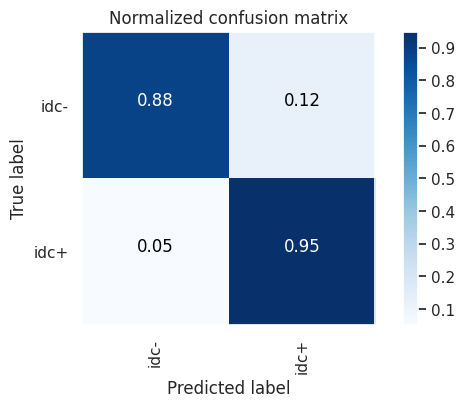

17389/17389 [==============================] - 15382s 885ms/step - loss: 0.2193 - accuracy: 0.9106 - val_loss: 23.3548 - val_accuracy: 0.9149
Epoch 6/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2177 - accuracy: 0.9111
Epoch 6: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 617s 276ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:17.825501


---------------------
| Balanced Accuracy  |
---------------------

    0.9139319058534131


---------------------
|      Accuracy      |
---------------------

    0.9139319058534131


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.945917  0.878068  0.910730     17887
           1   0.886228  0.949796  0.916912     17887

    accuracy                       0.913932     35774
   macro avg   0.916073  0.913932  0.913821     35774
weighted avg   0.916073  0.913932  0

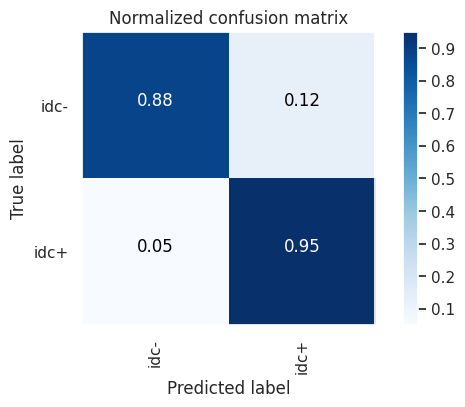

17389/17389 [==============================] - 15414s 886ms/step - loss: 0.2177 - accuracy: 0.9111 - val_loss: 25.3315 - val_accuracy: 0.9140
Epoch 7/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2165 - accuracy: 0.9115
Epoch 7: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 614s 274ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:14.244819


---------------------
| Balanced Accuracy  |
---------------------

    0.9137641862805389


---------------------
|      Accuracy      |
---------------------

    0.9137641862805389


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.946381  0.877229  0.910494     17887
           1   0.885589  0.950299  0.916804     17887

    accuracy                       0.913764     35774
   macro avg   0.915985  0.913764  0.913649     35774
weighted avg   0.915985  0.913764  0

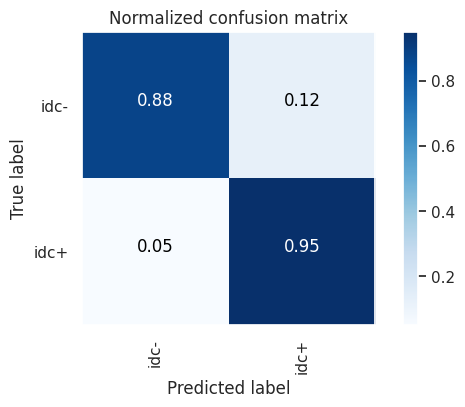

17389/17389 [==============================] - 15502s 891ms/step - loss: 0.2165 - accuracy: 0.9115 - val_loss: 39.1962 - val_accuracy: 0.9138
Epoch 8/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2148 - accuracy: 0.9124
Epoch 8: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 618s 276ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:18.359520


---------------------
| Balanced Accuracy  |
---------------------

    0.9109968133281154


---------------------
|      Accuracy      |
---------------------

    0.9109968133281154


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.952484  0.865153  0.906721     17887
           1   0.876479  0.956840  0.914898     17887

    accuracy                       0.910997     35774
   macro avg   0.914481  0.910997  0.910809     35774
weighted avg   0.914481  0.910997  0

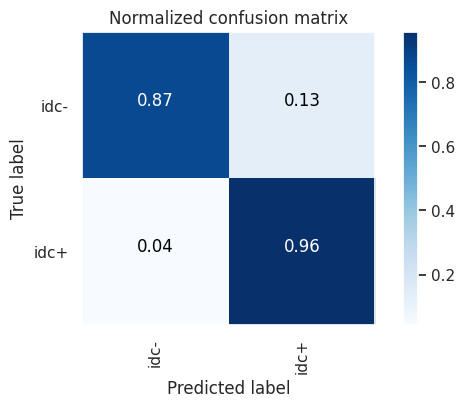

17389/17389 [==============================] - 15418s 887ms/step - loss: 0.2148 - accuracy: 0.9124 - val_loss: 20.9503 - val_accuracy: 0.9110
Epoch 9/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2135 - accuracy: 0.9134
Epoch 9: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 617s 276ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:17.574997


---------------------
| Balanced Accuracy  |
---------------------

    0.915385475484989


---------------------
|      Accuracy      |
---------------------

    0.915385475484989


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.944857  0.882261  0.912487     17887
           1   0.889576  0.948510  0.918098     17887

    accuracy                       0.915385     35774
   macro avg   0.917217  0.915385  0.915293     35774
weighted avg   0.917217  0.915385  0.9

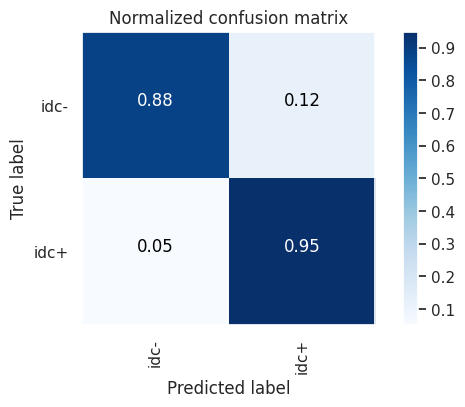

17389/17389 [==============================] - 15430s 887ms/step - loss: 0.2135 - accuracy: 0.9134 - val_loss: 21.0749 - val_accuracy: 0.9154
Epoch 10/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2128 - accuracy: 0.9136
Epoch 10: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 595s 266ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:09:55.592027


---------------------
| Balanced Accuracy  |
---------------------

    0.9161402135629229


---------------------
|      Accuracy      |
---------------------

    0.9161402135629227


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.946173  0.882484  0.913220     17887
           1   0.889896  0.949796  0.918871     17887

    accuracy                       0.916140     35774
   macro avg   0.918034  0.916140  0.916045     35774
weighted avg   0.918034  0.916140 

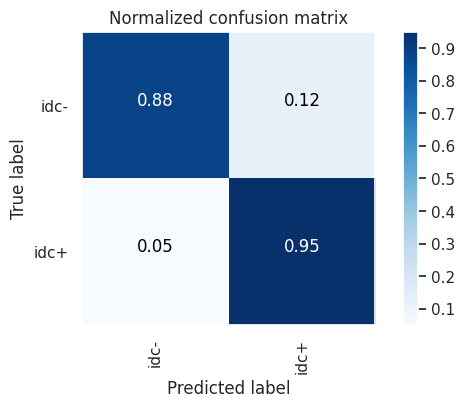

17389/17389 [==============================] - 15461s 889ms/step - loss: 0.2128 - accuracy: 0.9136 - val_loss: 29.2800 - val_accuracy: 0.9161
Epoch 11/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2114 - accuracy: 0.9139
Epoch 11: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 617s 276ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:18.108988


---------------------
| Balanced Accuracy  |
---------------------

    0.9152736624364064


---------------------
|      Accuracy      |
---------------------

    0.9152736624364063


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.938385  0.888914  0.912980     17887
           1   0.894477  0.941634  0.917450     17887

    accuracy                       0.915274     35774
   macro avg   0.916431  0.915274  0.915215     35774
weighted avg   0.916431  0.915274 

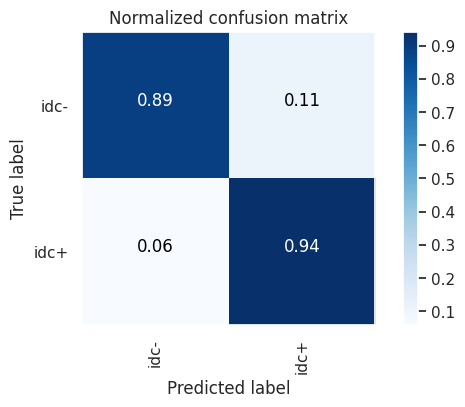

17389/17389 [==============================] - 15543s 894ms/step - loss: 0.2114 - accuracy: 0.9139 - val_loss: 27.2067 - val_accuracy: 0.9153
Epoch 12/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2096 - accuracy: 0.9153
Epoch 12: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 626s 280ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:29.286089


---------------------
| Balanced Accuracy  |
---------------------

    0.9151059428635322


---------------------
|      Accuracy      |
---------------------

    0.9151059428635322


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.934363  0.892939  0.913181     17887
           1   0.897484  0.937273  0.916947     17887

    accuracy                       0.915106     35774
   macro avg   0.915923  0.915106  0.915064     35774
weighted avg   0.915923  0.915106 

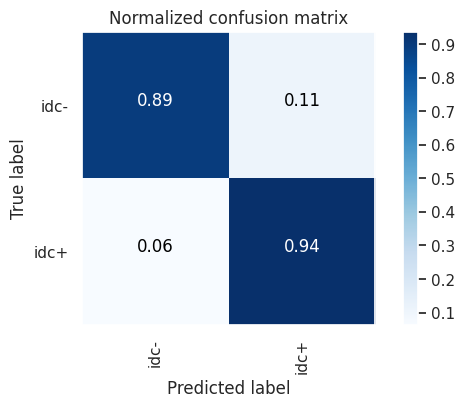

17389/17389 [==============================] - 15569s 895ms/step - loss: 0.2096 - accuracy: 0.9153 - val_loss: 21.9678 - val_accuracy: 0.9151
Epoch 13/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2094 - accuracy: 0.9152
Epoch 13: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 628s 281ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:28.332460


---------------------
| Balanced Accuracy  |
---------------------

    0.9124503829596914


---------------------
|      Accuracy      |
---------------------

    0.9124503829596914


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.941846  0.879186  0.909438     17887
           1   0.886722  0.945715  0.915269     17887

    accuracy                       0.912450     35774
   macro avg   0.914284  0.912450  0.912353     35774
weighted avg   0.914284  0.912450 

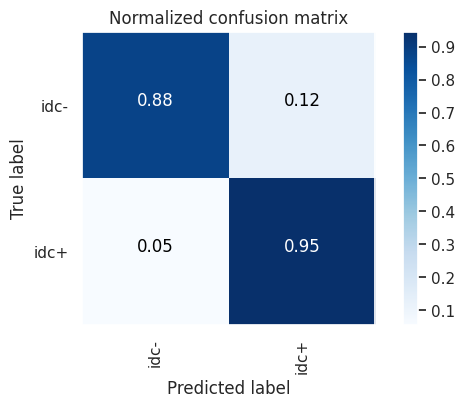

17389/17389 [==============================] - 15734s 905ms/step - loss: 0.2094 - accuracy: 0.9152 - val_loss: 27.9598 - val_accuracy: 0.9124
Epoch 14/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2083 - accuracy: 0.9152
Epoch 14: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 618s 277ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:19.116406


---------------------
| Balanced Accuracy  |
---------------------

    0.9133448873483536


---------------------
|      Accuracy      |
---------------------

    0.9133448873483535


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.950082  0.872533  0.909658     17887
           1   0.882152  0.954157  0.916743     17887

    accuracy                       0.913345     35774
   macro avg   0.916117  0.913345  0.913200     35774
weighted avg   0.916117  0.913345 

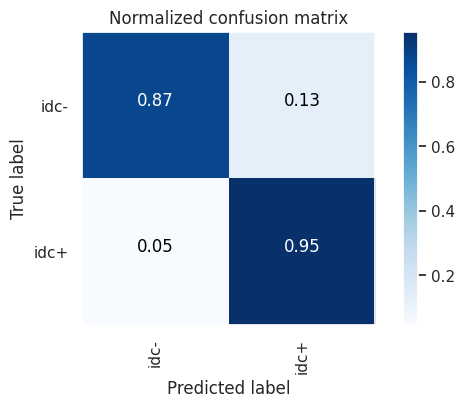

17389/17389 [==============================] - 15564s 895ms/step - loss: 0.2083 - accuracy: 0.9152 - val_loss: 24.3781 - val_accuracy: 0.9134
Epoch 15/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2068 - accuracy: 0.9161
Epoch 15: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 627s 281ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:27.792619


---------------------
| Balanced Accuracy  |
---------------------

    0.9134287471347906


---------------------
|      Accuracy      |
---------------------

    0.9134287471347906


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.952515  0.870241  0.909521     17887
           1   0.880558  0.956617  0.917013     17887

    accuracy                       0.913429     35774
   macro avg   0.916536  0.913429  0.913267     35774
weighted avg   0.916536  0.913429 

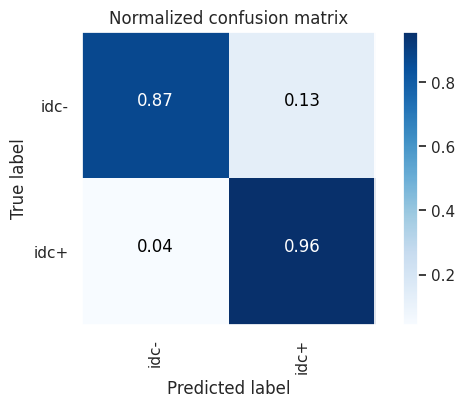

17389/17389 [==============================] - 15588s 896ms/step - loss: 0.2068 - accuracy: 0.9161 - val_loss: 21.6201 - val_accuracy: 0.9135
Epoch 16/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2062 - accuracy: 0.9160
Epoch 16: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 623s 279ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:23.552828


---------------------
| Balanced Accuracy  |
---------------------

    0.9138759993291217


---------------------
|      Accuracy      |
---------------------

    0.9138759993291217


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.947311  0.876502  0.910532     17887
           1   0.885092  0.951250  0.916979     17887

    accuracy                       0.913876     35774
   macro avg   0.916201  0.913876  0.913756     35774
weighted avg   0.916201  0.913876 

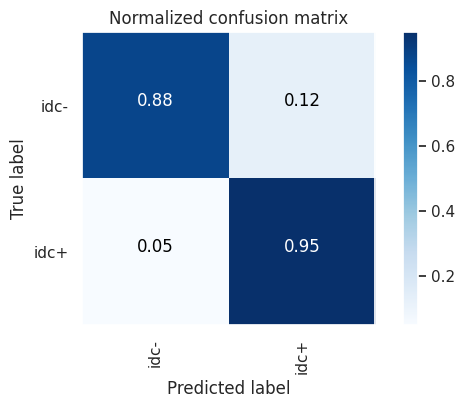

17389/17389 [==============================] - 15616s 898ms/step - loss: 0.2062 - accuracy: 0.9160 - val_loss: 35.1252 - val_accuracy: 0.9139
Epoch 17/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2049 - accuracy: 0.9165
Epoch 17: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 623s 278ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:23.407828


---------------------
| Balanced Accuracy  |
---------------------

    0.9140437189019959


---------------------
|      Accuracy      |
---------------------

    0.9140437189019959


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.947276  0.876894  0.910727     17887
           1   0.885408  0.951194  0.917123     17887

    accuracy                       0.914044     35774
   macro avg   0.916342  0.914044  0.913925     35774
weighted avg   0.916342  0.914044 

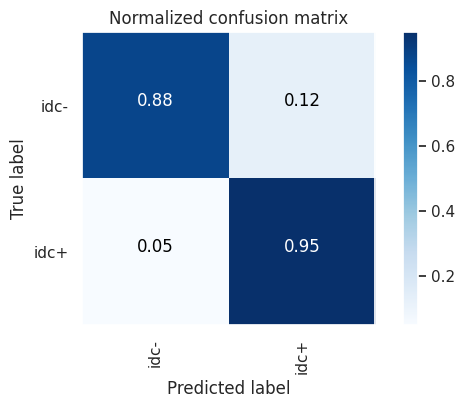

17389/17389 [==============================] - 15635s 899ms/step - loss: 0.2049 - accuracy: 0.9165 - val_loss: 61.9819 - val_accuracy: 0.9140
Epoch 18/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2044 - accuracy: 0.9169
Epoch 18: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 595s 266ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:09:55.838188


---------------------
| Balanced Accuracy  |
---------------------

    0.9126740090568569


---------------------
|      Accuracy      |
---------------------

    0.9126740090568569


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.950174  0.871024  0.908879     17887
           1   0.880941  0.954324  0.916166     17887

    accuracy                       0.912674     35774
   macro avg   0.915558  0.912674  0.912522     35774
weighted avg   0.915558  0.912674 

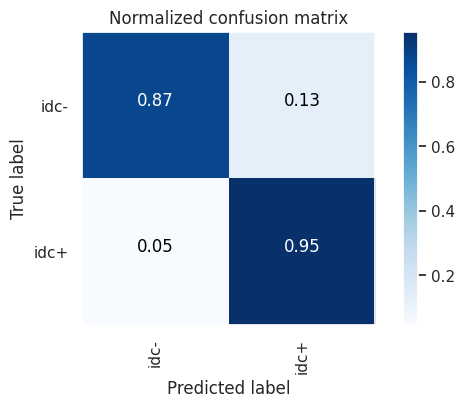

17389/17389 [==============================] - 15664s 901ms/step - loss: 0.2044 - accuracy: 0.9169 - val_loss: 39.1206 - val_accuracy: 0.9127
Epoch 19/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2033 - accuracy: 0.9176
Epoch 19: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 632s 283ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:33.216944


---------------------
| Balanced Accuracy  |
---------------------

    0.9145748308827639


---------------------
|      Accuracy      |
---------------------

    0.914574830882764


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.950216  0.874993  0.911054     17887
           1   0.884163  0.954157  0.917827     17887

    accuracy                       0.914575     35774
   macro avg   0.917189  0.914575  0.914441     35774
weighted avg   0.917189  0.914575  

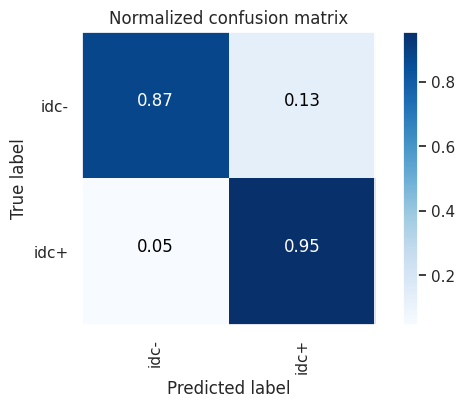

17389/17389 [==============================] - 15753s 906ms/step - loss: 0.2033 - accuracy: 0.9176 - val_loss: 54.1211 - val_accuracy: 0.9146
Epoch 20/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2020 - accuracy: 0.9179
Epoch 20: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 599s 268ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:09:59.426716


---------------------
| Balanced Accuracy  |
---------------------

    0.9099904958908704


---------------------
|      Accuracy      |
---------------------

    0.9099904958908704


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.931458  0.885112  0.907694     17887
           1   0.890558  0.934869  0.912175     17887

    accuracy                       0.909990     35774
   macro avg   0.911008  0.909990  0.909935     35774
weighted avg   0.911008  0.909990 

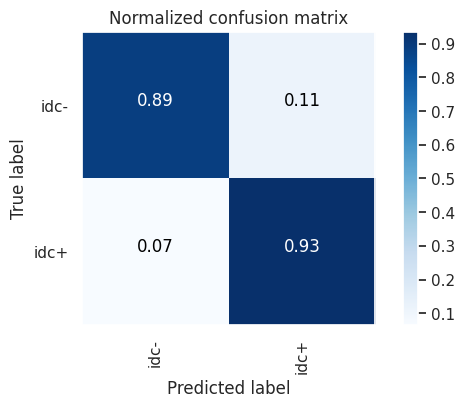

17389/17389 [==============================] - 15747s 906ms/step - loss: 0.2020 - accuracy: 0.9179 - val_loss: 56.8138 - val_accuracy: 0.9100
Epoch 21/30
17389/17389 [==============================] - ETA: 0s - loss: 0.2004 - accuracy: 0.9191
Epoch 21: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 637s 285ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:37.856874


---------------------
| Balanced Accuracy  |
---------------------

    0.9151618493878235


---------------------
|      Accuracy      |
---------------------

    0.9151618493878235


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.941341  0.885503  0.912569     17887
           1   0.891915  0.944820  0.917606     17887

    accuracy                       0.915162     35774
   macro avg   0.916628  0.915162  0.915087     35774
weighted avg   0.916628  0.915162 

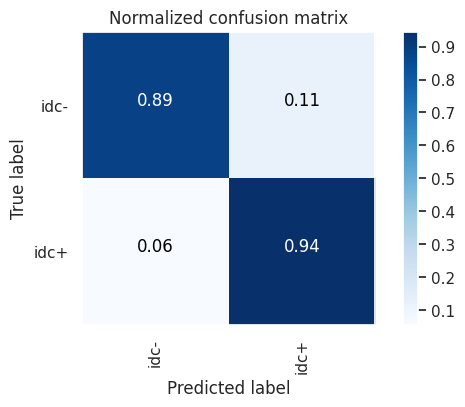

17389/17389 [==============================] - 15748s 906ms/step - loss: 0.2004 - accuracy: 0.9191 - val_loss: 44.1964 - val_accuracy: 0.9152
Epoch 22/30
17389/17389 [==============================] - ETA: 0s - loss: 0.1996 - accuracy: 0.9191
Epoch 22: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 633s 283ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:33.454437


---------------------
| Balanced Accuracy  |
---------------------

    0.9071672164141555


---------------------
|      Accuracy      |
---------------------

    0.9071672164141555


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.950792  0.858780  0.902447     17887
           1   0.871241  0.955554  0.911452     17887

    accuracy                       0.907167     35774
   macro avg   0.911016  0.907167  0.906949     35774
weighted avg   0.911016  0.907167 

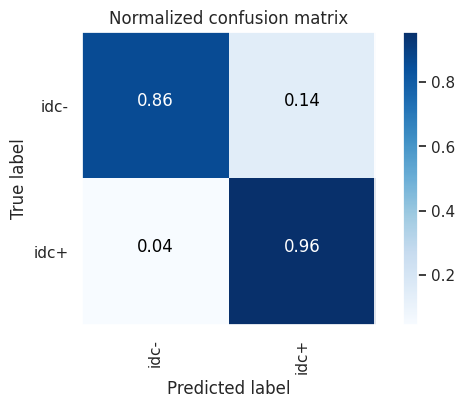

17389/17389 [==============================] - 15800s 909ms/step - loss: 0.1996 - accuracy: 0.9191 - val_loss: 62.4799 - val_accuracy: 0.9072
Epoch 23/30
17389/17389 [==============================] - ETA: 0s - loss: 0.1992 - accuracy: 0.9196
Epoch 23: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 633s 283ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:33.825023


---------------------
| Balanced Accuracy  |
---------------------

    0.9089003186671885


---------------------
|      Accuracy      |
---------------------

    0.9089003186671885


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.952879  0.860346  0.904251     17887
           1   0.872707  0.957455  0.913119     17887

    accuracy                       0.908900     35774
   macro avg   0.912793  0.908900  0.908685     35774
weighted avg   0.912793  0.908900 

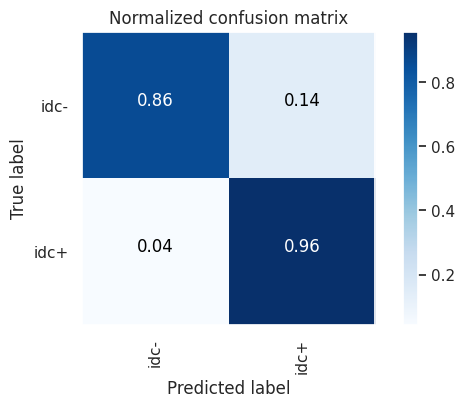

17389/17389 [==============================] - 15779s 907ms/step - loss: 0.1992 - accuracy: 0.9196 - val_loss: 57.0689 - val_accuracy: 0.9089
Epoch 24/30
17389/17389 [==============================] - ETA: 0s - loss: 0.1978 - accuracy: 0.9199
Epoch 24: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 636s 284ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:36.264441


---------------------
| Balanced Accuracy  |
---------------------

    0.911220439425281


---------------------
|      Accuracy      |
---------------------

    0.911220439425281


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.951285  0.866831  0.907096     17887
           1   0.877689  0.955610  0.914994     17887

    accuracy                       0.911220     35774
   macro avg   0.914487  0.911220  0.911045     35774
weighted avg   0.914487  0.911220  0

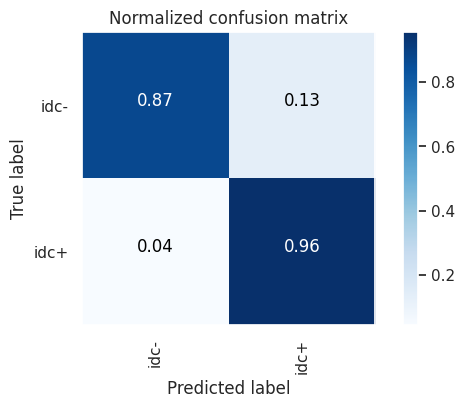

17389/17389 [==============================] - 15906s 915ms/step - loss: 0.1978 - accuracy: 0.9199 - val_loss: 44.0344 - val_accuracy: 0.9112
Epoch 25/30
17389/17389 [==============================] - ETA: 0s - loss: 0.1970 - accuracy: 0.9204
Epoch 25: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 634s 284ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:34.683511


---------------------
| Balanced Accuracy  |
---------------------

    0.9101023089394533


---------------------
|      Accuracy      |
---------------------

    0.9101023089394532


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.941765  0.874266  0.906761     17887
           1   0.882675  0.945938  0.913212     17887

    accuracy                       0.910102     35774
   macro avg   0.912220  0.910102  0.909987     35774
weighted avg   0.912220  0.910102 

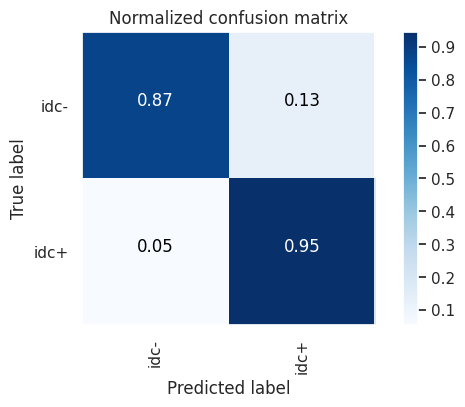

17389/17389 [==============================] - 15765s 907ms/step - loss: 0.1970 - accuracy: 0.9204 - val_loss: 56.0611 - val_accuracy: 0.9101
Epoch 26/30
17389/17389 [==============================] - ETA: 0s - loss: 0.1961 - accuracy: 0.9202
Epoch 26: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 637s 285ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:38.030341


---------------------
| Balanced Accuracy  |
---------------------

    0.9143232515234527


---------------------
|      Accuracy      |
---------------------

    0.9143232515234528


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.940397  0.884721  0.911710     17887
           1   0.891164  0.943926  0.916787     17887

    accuracy                       0.914323     35774
   macro avg   0.915781  0.914323  0.914248     35774
weighted avg   0.915781  0.914323 

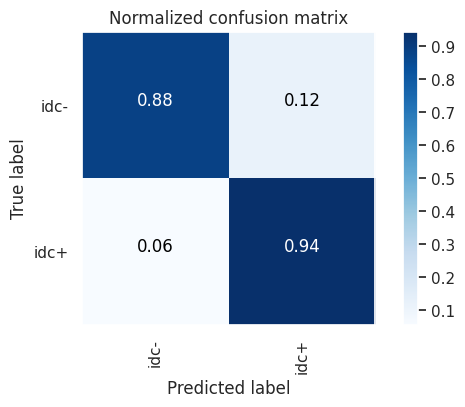

17389/17389 [==============================] - 15789s 908ms/step - loss: 0.1961 - accuracy: 0.9202 - val_loss: 26.4316 - val_accuracy: 0.9143
Epoch 27/30
17389/17389 [==============================] - ETA: 0s - loss: 0.1956 - accuracy: 0.9207
Epoch 27: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 639s 286ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:39.999417


---------------------
| Balanced Accuracy  |
---------------------

    0.9108290937552412


---------------------
|      Accuracy      |
---------------------

    0.9108290937552412


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.943135  0.874378  0.907456     17887
           1   0.882914  0.947280  0.913965     17887

    accuracy                       0.910829     35774
   macro avg   0.913024  0.910829  0.910710     35774
weighted avg   0.913024  0.910829 

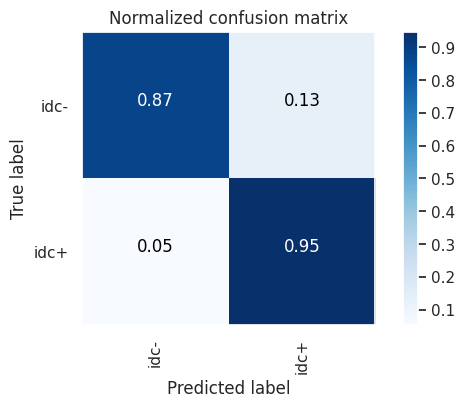

17389/17389 [==============================] - 15821s 910ms/step - loss: 0.1956 - accuracy: 0.9207 - val_loss: 34.5520 - val_accuracy: 0.9108
Epoch 28/30
17389/17389 [==============================] - ETA: 0s - loss: 0.1944 - accuracy: 0.9209
Epoch 28: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 649s 290ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:49.437940


---------------------
| Balanced Accuracy  |
---------------------

    0.9111924861631352


---------------------
|      Accuracy      |
---------------------

    0.9111924861631352


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.951670  0.866383  0.907026     17887
           1   0.877373  0.956002  0.915001     17887

    accuracy                       0.911192     35774
   macro avg   0.914522  0.911192  0.911014     35774
weighted avg   0.914522  0.911192 

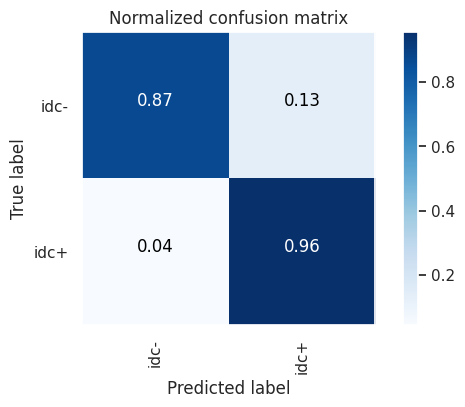

17389/17389 [==============================] - 15977s 919ms/step - loss: 0.1944 - accuracy: 0.9209 - val_loss: 29.4764 - val_accuracy: 0.9112
Epoch 29/30
17389/17389 [==============================] - ETA: 0s - loss: 0.1937 - accuracy: 0.9213
Epoch 29: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 699s 313ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:11:40.201955


---------------------
| Balanced Accuracy  |
---------------------

    0.912757868843294


---------------------
|      Accuracy      |
---------------------

    0.912757868843294


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.946372  0.875105  0.909344     17887
           1   0.883852  0.950411  0.915924     17887

    accuracy                       0.912758     35774
   macro avg   0.915112  0.912758  0.912634     35774
weighted avg   0.915112  0.912758  0

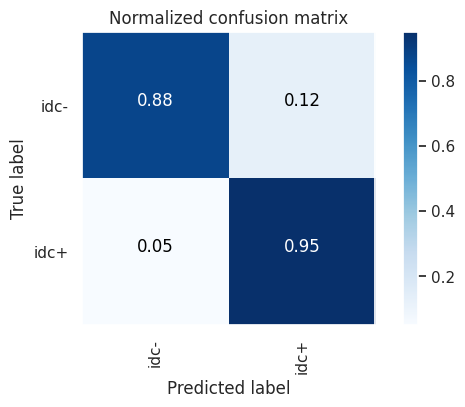

17389/17389 [==============================] - 16108s 926ms/step - loss: 0.1937 - accuracy: 0.9213 - val_loss: 34.5215 - val_accuracy: 0.9128
Epoch 30/30
17389/17389 [==============================] - ETA: 0s - loss: 0.1930 - accuracy: 0.9222
Epoch 30: val_accuracy did not improve from 0.91711
Predicting test data
2236/2236 [==============================] - 646s 289ms/step
Done 
 

testing time(HH:MM:SS:ms) - 0:10:46.873094


---------------------
| Balanced Accuracy  |
---------------------

    0.9107731872309499


---------------------
|      Accuracy      |
---------------------

    0.9107731872309498


-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0   0.942861  0.874546  0.907419     17887
           1   0.883021  0.947001  0.913893     17887

    accuracy                       0.910773     35774
   macro avg   0.912941  0.910773  0.910656     35774
weighted avg   0.912941  0.910773 

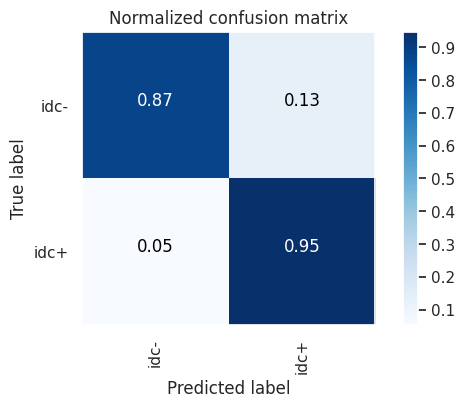

17389/17389 [==============================] - 16130s 928ms/step - loss: 0.1930 - accuracy: 0.9222 - val_loss: 41.6422 - val_accuracy: 0.9108


In [41]:
'''
#using augmentation data
history = model.fit_generator(train_generator, 
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              class_weight =class_weights,
                              epochs = 70,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )
#using raw data
history = model.fit_generator(train_data_label, 
                              steps_per_epoch = epoch_step,
                              validation_data=train_val_data,
                              epochs = 70,
                              validation_steps= val_step, 
                              class_weight =class_weights,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )


epoch_step = (len(train_data) // 16)
print(epoch_step)
val_step=len(test_data)// 16
print(val_step)
train_val_data=(test_data, test_label)
#print(train_generator.shape)
train_data_label=(train_data,train_label)
#print(val_generator.shape)
#(self, generator, steps_per_epoch, epochs, verbose, callbacks, validation_data, validation_steps, validation_freq, class_weight, max_queue_size, workers, use_multiprocessing, shuffle, initial_epoch)

history = model.fit_generator( 
                        train_datagen.flow(train_data,train_label),
                        steps_per_epoch=epoch_step,
                        epochs = 70,
                        verbose = 1,
                        callbacks = get_callbacks(),
                        validation_data=(test_data,test_label),
                        validation_steps = val_step,
                        class_weight =weights
                        )

'''
from keras.models import load_model
first_model_path='C:/Users/2351980g/Documents/output/covxnet/input/best-models/12000x2 data 7th0.9004 30epoch lre-4 9088.h5'
model.load_weights(first_model_path)
print("load weight success")
model.trainable=True

history = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_data) // 16,
                              validation_data=val_generator,
                              validation_steps= len(test_data)// 16,
                              epochs = epoch_4_test,
                              callbacks = get_callbacks(),
                              verbose = 1
                              )

##Loading Best Model

In [42]:
from keras.models import load_model
#best_model = load_model('./best_model_multiclass_128.h5')
model1 = load_model('C:/Users/2351980g/Documents/output/covxnet/230117oversampling/History/best_model_multiclass_128.h5', compile=False)

Best Model Performance

analyse of best model
VAL kappa
0.8274829279980831
analyse 1st model
report of val data
              precision    recall  f1-score   support

           0   0.944089  0.879573  0.910690     41735
           1   0.887277  0.947909  0.916591     41735

    accuracy                       0.913741     83470
   macro avg   0.915683  0.913741  0.913641     83470
weighted avg   0.915683  0.913741  0.913641     83470



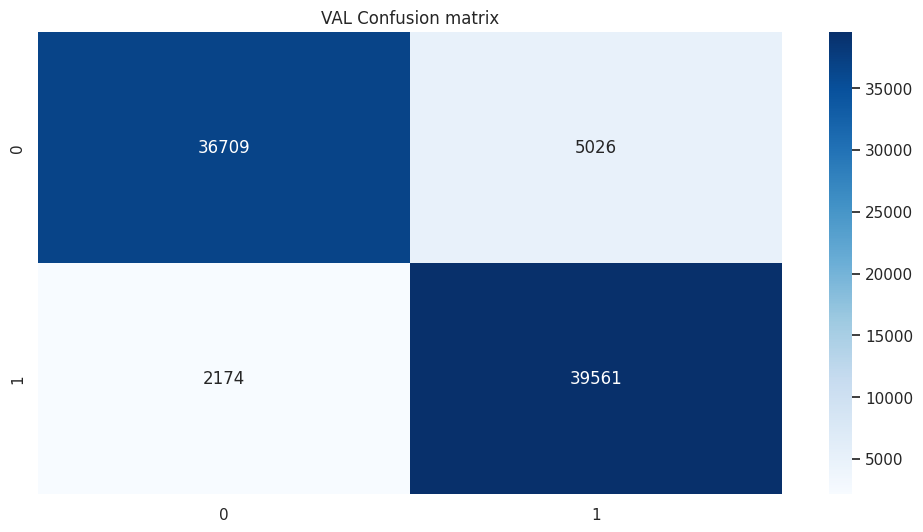

In [43]:
import sklearn
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix
#---------------
from keras.models import load_model

#model1 = load_model('./best_model_multiclass_128.h5', compile=False)
print("analyse of best model")


cf_matrix_val = confusion_matrix(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)

plt.figure(figsize = (12, 6))
sns.heatmap(cf_matrix_val, annot=True, cmap='Blues', fmt='g')
plt.title("VAL Confusion matrix")
# kappa VAL
kappa_val = cohen_kappa_score(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) 
)
print("VAL kappa")
print(kappa_val)



print("analyse 1st model")
print("report of val data")
report = sklearn.metrics.classification_report(
    np.concatenate([np.argmax(val2_generator[i][1], axis=1) for i in range(len(val2_generator))]),    
    np.argmax(model1.predict_generator(val2_generator, steps=len(val2_generator)), axis=1) , digits=6
)
print(report)

roc analysis of test dataset


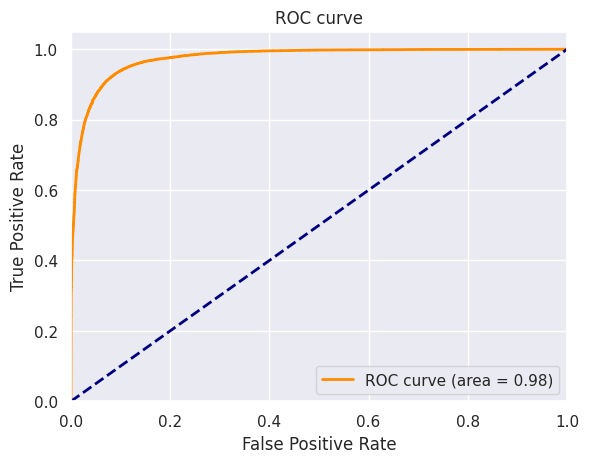

auc value
0.975136085128493


In [44]:
print("roc analysis of test dataset")
#y_score = model1.predict_proba(test_label)
y_score = model1.predict_generator(val_generator)
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 2 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
no_class=1
plt.plot(fpr[no_class], tpr[no_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[no_class]) # Drawing Curve according to 1. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr[no_class], tpr[no_class])
print("auc value")
print(roc_auc)

report of test data
              precision    recall  f1-score   support

           0  0.9457522 0.8850003 0.9143682     17887
           1  0.8919416 0.9492369 0.9196977     17887

    accuracy                      0.9171186     35774
   macro avg  0.9188469 0.9171186 0.9170330     35774
weighted avg  0.9188469 0.9171186 0.9170330     35774

TEST kappa
0.834237155476044


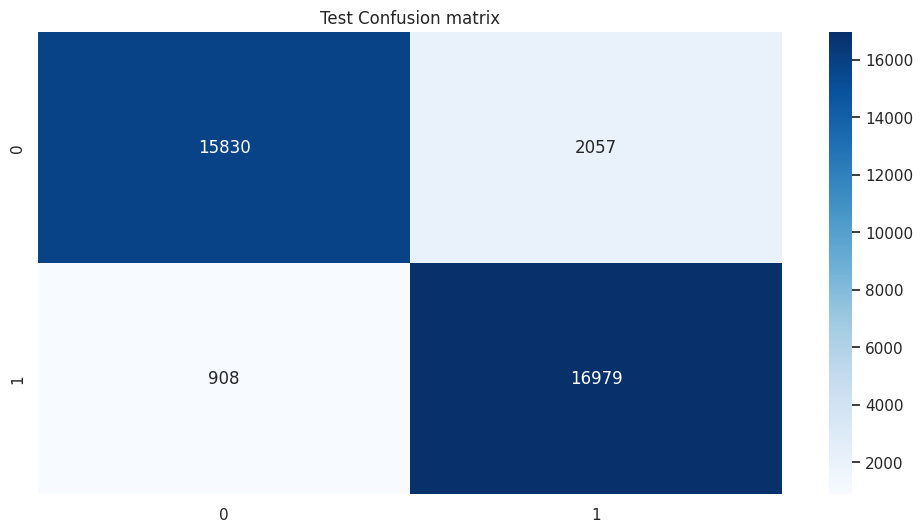

In [45]:
#------------------
cf_matrix_test = confusion_matrix(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1) 
)

plt.figure(figsize = (12, 6))
sns.heatmap(cf_matrix_test, annot=True, cmap='Blues', fmt='g')
plt.title("Test Confusion matrix")



print("report of test data")
import sklearn

report = sklearn.metrics.classification_report(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1) , digits=7
)
print(report)


# kappa TEST
kappa_test = cohen_kappa_score(
    np.concatenate([np.argmax(val_generator[i][1], axis=1) for i in range(len(val_generator))]),    
    np.argmax(model1.predict_generator(val_generator, steps=len(val_generator)), axis=1)
)
print("TEST kappa")
print(kappa_test)

roc analysis of validation dataset


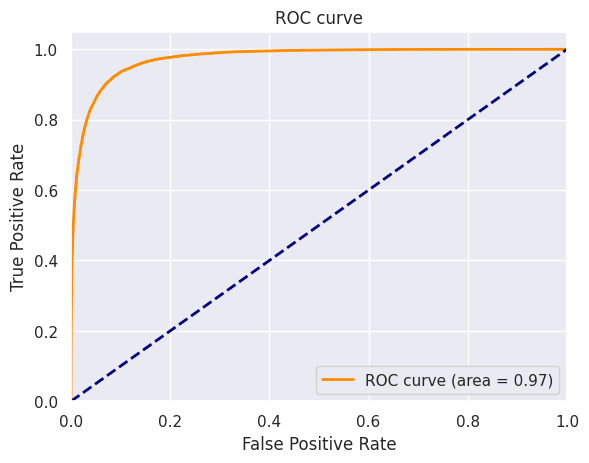

auc value
0.9740823567619141


In [46]:
print("roc analysis of validation dataset")
#y_score = model1.predict_proba(test_label)
y_score = model1.predict_generator(val2_generator)
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 2 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_label[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(val_label.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
no_class=1
plt.plot(fpr[no_class], tpr[no_class], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[no_class]) # Drawing Curve according to 1. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
roc_auc = auc(fpr[no_class], tpr[no_class])
print("auc value")
print(roc_auc)

5217/5217 [==============================] - 1480s 284ms/step
validation auc
0.9137414639990415
validation roc


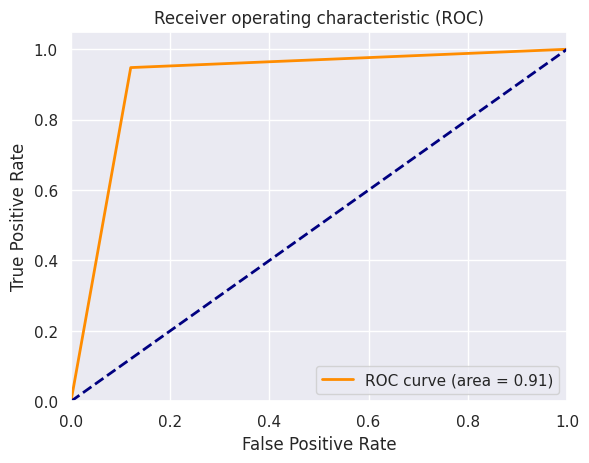

In [47]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve

y_pred_keras= model1.predict_generator(val2_generator,verbose=1)
#.ravel()
y_pred_keras=np.argmax(y_pred_keras,axis=1)
#print(y_pred_keras2)
#print(len(y_pred_keras2))

val_label2=np.argmax(val_label, axis=1)
#print(test_label2)
#print(len(test_label2))

#fpr_keras, tpr_keras, thresholds_keras = roc_curve(val_label2, y_pred_keras)

from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(val_label2, y_pred_keras
                                 #, pos_label=9
                                )
roc_auc = auc(fpr, tpr)
print("validation auc")
print(roc_auc)

print("validation roc")
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

2236/2236 [==============================] - 643s 287ms/step
test auc
0.9171185777380221
test roc


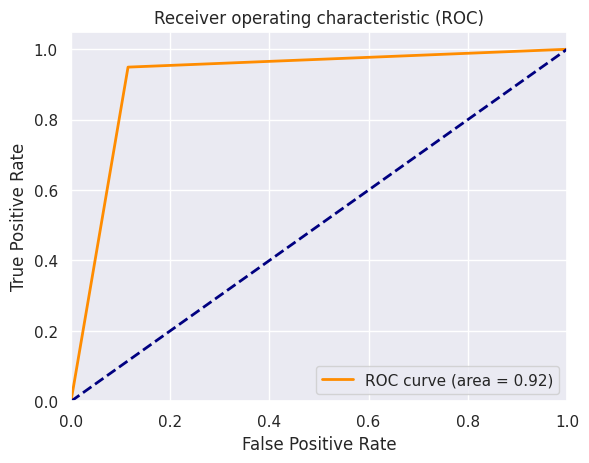

In [48]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve

y_pred_keras2= model1.predict_generator(val_generator,verbose=1)
#.ravel()
y_pred_keras2=np.argmax(y_pred_keras2,axis=1)
#print(y_pred_keras2)
#print(len(y_pred_keras2))

test_label2=np.argmax(test_label, axis=1)
#print(test_label2)
#print(len(test_label2))

fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_label2, y_pred_keras2)

from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(test_label2, y_pred_keras2
                                 #, pos_label=9
                                )
roc_auc = auc(fpr, tpr)
print("test auc")
print(roc_auc)
print("test roc")
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [49]:
'''

#must use train_label1 as train_label went through a shuffle in image-data-generator
test_final_model(best_model, train_generator, 
               val_generator, val2_generator, 
               np.argmax(train_label1, axis=1),
               np.argmax(test_label, axis=1),
               np.argmax(val_label, axis=1), 
               class_labels = ['idc-', 'idc+'])
               '''

"\n\n#must use train_label1 as train_label went through a shuffle in image-data-generator\ntest_final_model(best_model, train_generator, \n               val_generator, val2_generator, \n               np.argmax(train_label1, axis=1),\n               np.argmax(test_label, axis=1),\n               np.argmax(val_label, axis=1), \n               class_labels = ['idc-', 'idc+'])\n               "

# Plotting EpochPlot

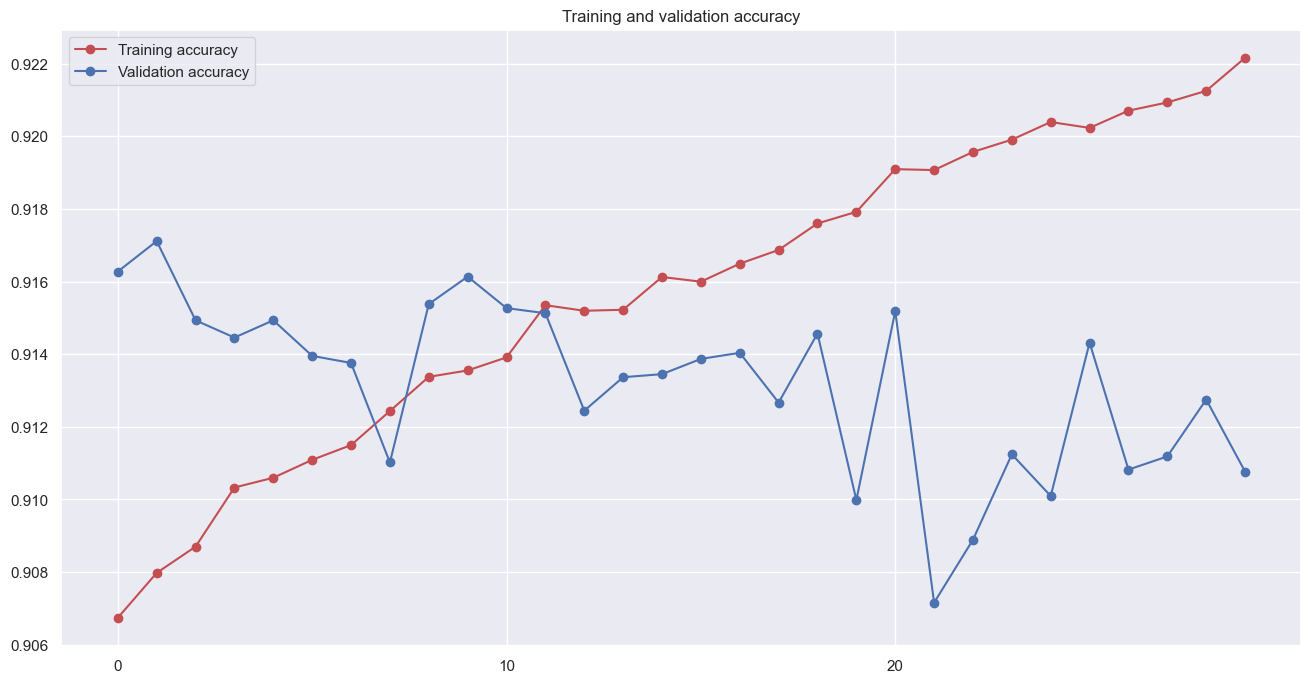

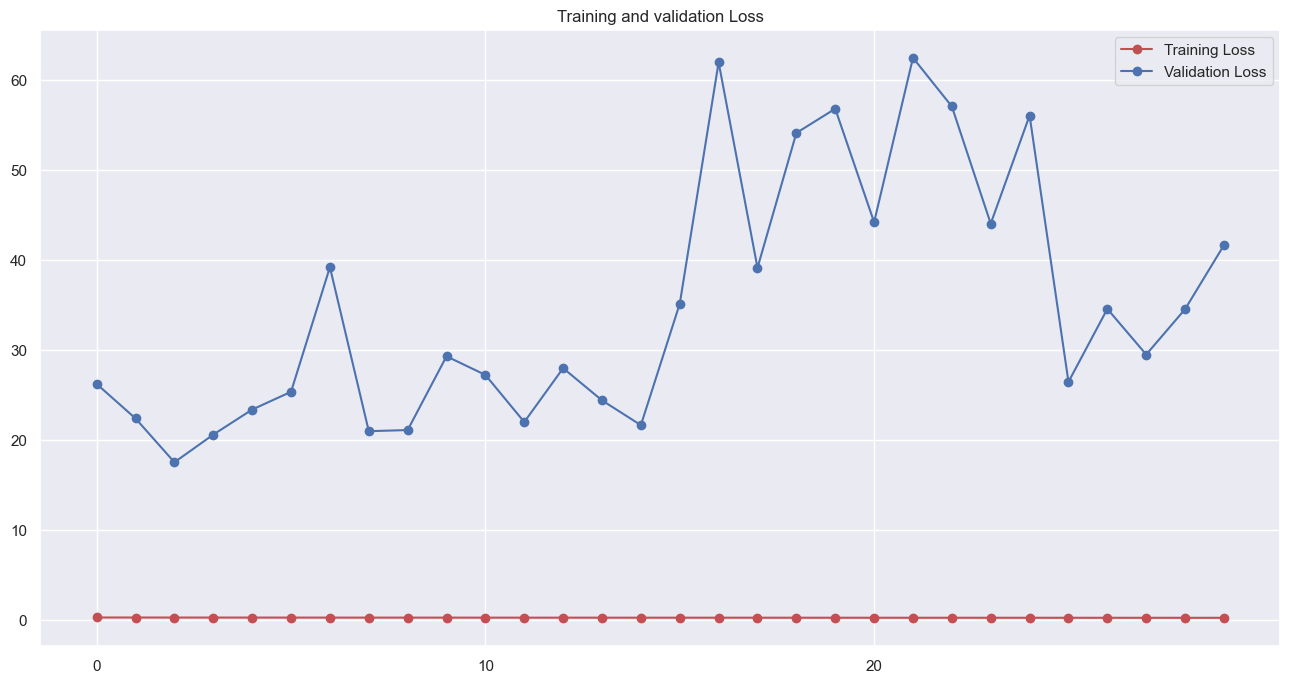

<Figure size 640x480 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(0,len(acc))
fig = plt.gcf()
fig.set_size_inches(16, 8)

plt.plot(epochs, acc, 'r', label='Training accuracy',marker = "o")
plt.plot(epochs, val_acc, 'b', label='Validation accuracy',marker = "o")
plt.title('Training and validation accuracy')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
plt.figure()

fig = plt.gcf()
fig.set_size_inches(16, 8)
plt.plot(epochs, loss, 'r', label='Training Loss',marker = "o")
plt.plot(epochs, val_loss, 'b', label='Validation Loss',marker = "o")
plt.title('Training and validation Loss')
plt.xticks(np.arange(0, len(acc), 10))
plt.legend(loc=0)
#plt.savefig('Multiclass Model .png')
plt.figure()
plt.show()


In [51]:
#print(y_test)

from sklearn.cross_validation import train_test_split# Grad-CAM and Saliency Map 
coming soon....